In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

training_data_dir = "data/train"
letters = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]

In [2]:
img_size = 64
training_data = []
labels = []

from tensorflow.keras.utils import to_categorical

def create_training_dataset():
    for letter in letters:
        path = os.path.join(training_data_dir, letter)
        label_class = letters.index(letter)
        for image in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,image))
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_data.append(new_array)
                labels.append(label_class)
            except Exception as e:
                pass
            
    training_data_arr = np.array(training_data)
    training_data_norm = training_data_arr.astype('float32')/255
    
    labels_categ = to_categorical(labels)
#     print(training_data_norm[1])
    print(len(training_data_norm), training_data_norm.shape)
    return training_data_norm, labels_categ
#     X_train is training_data_norm
#     y_train is labels_categ

In [3]:
training_data_norm, labels_categ = create_training_dataset()

78000 (78000, 64, 64, 3)


import random

random.shuffle(training_data)

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import regularizers

In [5]:
print(len(training_data_norm), training_data_norm.shape[1:])

78000 (64, 64, 3)


In [6]:
model = Sequential()

model.add(Conv2D(16, (3,3), activation="relu", padding="same", input_shape = training_data_norm.shape[1:]))
model.add(Conv2D(32, (3,3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), activation="relu", padding="same"))
model.add(Conv2D(64, (3,3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Conv2D(128, (3,3), activation="relu", padding="same"))
model.add(Conv2D(256, (3,3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(BatchNormalization())
model.add(Flatten())

model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(26, activation="softmax"))
          
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       7

In [8]:
model.fit(training_data_norm, labels_categ, batch_size=64, epochs=15, validation_split=0.1)

Train on 70200 samples, validate on 7800 samples
Epoch 1/15
70200/70200 [==============================] - 1720s 25ms/sample - loss: 1.0559 - acc: 0.8511 - val_loss: 29.9242 - val_acc: 0.0315
Epoch 2/15
70200/70200 [==============================] - 1487s 21ms/sample - loss: 0.5756 - acc: 0.9713 - val_loss: 20.0796 - val_acc: 0.0629
Epoch 3/15
70200/70200 [==============================] - 1463s 21ms/sample - loss: 0.5687 - acc: 0.9753 - val_loss: 23.7541 - val_acc: 0.0827
Epoch 4/15
70200/70200 [==============================] - 1434s 20ms/sample - loss: 0.4889 - acc: 0.9818 - val_loss: 19.3342 - val_acc: 0.1203
Epoch 5/15
70200/70200 [==============================] - 1483s 21ms/sample - loss: 0.4892 - acc: 0.9823 - val_loss: 24.8581 - val_acc: 0.0405
Epoch 6/15
70200/70200 [==============================] - 1477s 21ms/sample - loss: 0.3723 - acc: 0.9869 - val_loss: 22.3143 - val_acc: 0.0745
Epoch 7/15
70200/70200 [==============================] - 1468s 21ms/sample - loss: 0.3437 - 

In [9]:
model.save("cnn_sign.h5")

In [28]:
test_data_dir = "data/test/"

def load_testing_data():
    img_size = 64
    testing_data = []
    labels = []
    for image in os.listdir(test_data_dir):
        try:
            img_array = cv2.imread(test_data_dir + image)
            new_array = cv2.resize(img_array, (img_size,img_size))
            testing_data.append(new_array)
            labels.append(image)
        except Exception as e:
            pass
            
    testing_data_arr = np.array(testing_data)
    testing_data_norm = testing_data_arr.astype('float32')/255
#     print(labels)
#     labels_categ = to_categorical(labels)
    return testing_data_norm, labels
# , labels_categ
#     X_test is testing_data_norm
#     y_test is labels_categ
testing_data_norm, labels_categ = load_testing_data()

In [29]:
predictions = [model.predict_classes(image.reshape(1,64,64,3))[0] for image in testing_data_norm]
print(predictions)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 9, 23]


In [30]:
letter_decode = {"A":0, "B":1, "C":2, "D":3, "E":4, "F":5, "G":6, "H":7, "I":8, "J":9, "K":10, "L":11, "M":12, "N":13, "O":14, "P":15, "Q":16, "R":17, "S":18, "T":19, "U":20, "V":21, "W":22, "X":23, "Y":24, "Z":25}

def decodePredictions(p):
    decoded_predictions = []
    for i in range(len(p)):
        for letter in letter_decode:
            if p[i] == letter_decode[letter]:
                decoded_predictions.append(letter)
    return decoded_predictions

prediction_letters = decodePredictions(predictions)
print(prediction_letters)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'J', 'X']


In [24]:
acc = [0.8511, 0.9713, 0.9753, 0.9818, 0.9823, 0.9869, 0.9881, 0.9895, 0.9900, 0.9915, 0.9928, 0.9931, 0.9956, 0.9960, 0.9961]
loss = [0.1173, 0.1567, 0.1754, 0.1814, 0.2089, 0.2255, 0.3004, 0.3357, 0.3437, 0.3723, 0.4889, 0.4892, 0.5687, 0.5756, 1.0559]
val_acc = [0.0315, 0.0405, 0.0597, 0.0629, 0.0647, 0.0745, 0.0783, 0.0827, 0.0872, 0.0995, 0.1027, 0.1104, 0.1176, 0.1203, 0.1363]
val_loss = [18.5049, 19.3342, 20.0796, 20.8717, 22.0431, 22.3143, 22.8278, 23.7541, 24.2254, 24.8581, 27.2950, 28.9968, 29.9242, 30.9159, 31.3440]

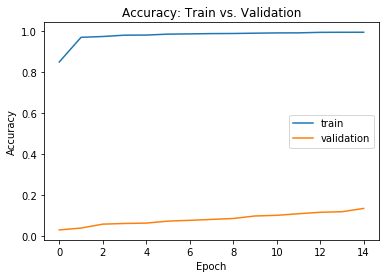

In [26]:
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['train', 'validation'], loc='best')
plt.title("Accuracy: Train vs. Validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

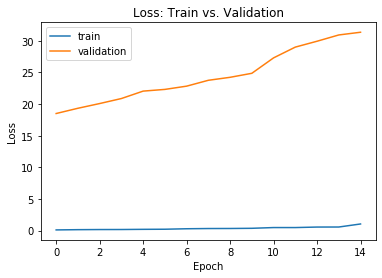

In [27]:
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['train', 'validation'], loc='best')
plt.title("Loss: Train vs. Validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()